## Multiclass Classification for Afaan Oromo news using Machine Learning

## Introduction

With huge news generated from internet and social media, understanding and make sense of them have huge benefit in saving peoples valueable time. Afaan oromo which is third most spoken language in africa[cite], and working language of Oromia state government, used as news distribution by many news channel; including internationally known, BBC and VOA. This work focus on creating a model to catogrizes news in to diffrent catagory. To do this we will use word vectors generating tool from fasttext.

### importing necessery package

In [1]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import fasttext
import warnings
import transformers
import wandb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from matplotlib import pyplot as py
from collections import Counter
import torchcontrib
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
matplotlib.style.use('Solarize_Light2')

### Dataset

We have manually collected over 2000 news from diffrent news agencies, including FBC, OBN, BBC, VOA and soon. The news have diffrent catogories. let start by loading the data.

In [3]:
df = pd.read_csv('news10.csv')

In [4]:
df.shape

(4261, 2)

In [5]:
print(df.head())

                                                news     catagory
0  Ministeerichi qabeenya uummaamaa irratti marii...  agriculture
1  Ministeerri Qonnaa FDRI oomishti qonnaan bulaa...  agriculture
2  OBN Mud.30,2012- Oomisha baranaarraa callaan k...  agriculture
3  BN Mud.30,2012- Godina Boorana Aanalee 12 kees...  agriculture
4  Naannoo Oromiyaatti misooma jallisiin lafa hek...  agriculture


We have **4261** row and there are two columns namely news and catagory

In [6]:
print(df.describe())

print('\nInformation about each column\n')
df.info()

                                                     news  catagory
count                                                4261      4261
unique                                               4192        10
top     Dhaabbata Madaaallii Ga’umsa Ityoophiyaatti Gi...  politics
freq                                                    3       665

Information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   news      4261 non-null   object
 1   catagory  4261 non-null   object
dtypes: object(2)
memory usage: 66.7+ KB


We dont have nan values so we can use the whole data as it is.

We have 10 news catagory in our data set with unbalanced number as dipicted blow

In [11]:
df['catagory'].value_counts()

politics       665
health         483
agriculture    435
education      432
technology     432
weather        431
sports         430
economics      344
business       315
others         294
Name: catagory, dtype: int64

<AxesSubplot:>

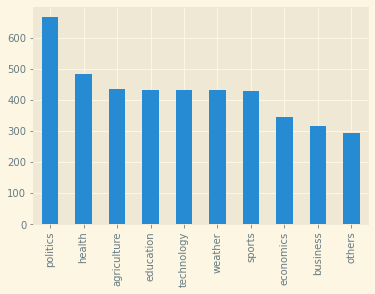

In [12]:
df['catagory'].value_counts().plot(kind = 'bar')

In [9]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) + ' %'

In [10]:
pie = data['catagory'].value_counts().plot(kind='pie', figsize=(10,8), autopct=autopct,fontsize=18)
fig = pie.get_figure()
pie.axis('off')
fig.savefig("myplot.png")

NameError: name 'data' is not defined

### We have to Deal with Imbalanced class if metrics is Accuracy Or we have to balance the class

## Preprocessing data 

In [13]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.strip()
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
df['news'] = df['news'].apply(lambda x:clean_text(x))

### Tokenization and Word Embedding 

Tokenization is the processess of decomposing a sentence to its subword or word representaiton while word embedding is just vectorization of the token. Here we have two option for word embedding 
- Train our own word Embedding using fasttext tool
- use pretrained vector from fasttext which is trained on large wiki text

we will try both to choose the most accurate one


1. Train word embedding using fasstext tool, word embedding can be constructed using two algorithm:
    * CBOW and 
    * Skipgram 

it turns out skip gram have good performance (citation)

Since pretrained vector does not have performance advantage we stick to the vector trained on our data

In [ ]:
# with open('data/data0.txt', encoding='utf-8-sig') as f:
#     dat = f.read()
    

In [ ]:
sentence = []
for line in dat.split(' '):
    sentence.append(line)
    

In [ ]:
def preprocess_data(text):
    new_str = text.replace("'", 'h')
    # replace all variants of hudhaa (')
    new_str = new_str.replace("'", 'h')
    new_str = new_str.replace(u'’','h')
    new_str = new_str.replace("‘", "h");
    new_str = new_str.replace("`", "h");
    new_str = new_str.replace("’", "h");
    new_str = new_str.replace("′", "h");
    new_str = new_str.replace("︐", "h");
    new_str = new_str.replace('(', '')
    new_str = new_str.replace(')', '')
    return listToString(new_str)

In [ ]:
words = []
for sent in sentence:
    words.append(preprocess_data(sent))

In [ ]:
def list_to_sent(lst):
    return ' '.join(l for l in lst)

In [ ]:
dot = ''
for word in words:
    dot += ' '+''.join(word)
    
    

In [ ]:
with open('data/data2.txt', 'w', encoding='utf-8-sig') as f:
    f.write(dot)

In [ ]:
# model = fasttext.train_unsupervised('data/data0.txt', model='skipgram', dim=300, epoch=20)

In [ ]:
# model.save_model('ao_word_emb.bin')

In [15]:
model_f = fasttext.load_model('text_vec8.bin')
print('commented')

commented


In [16]:
aa = model_f.get_word_vector("finfinnee")
aa.shape

(300,)

### Now we have two word embedding, word embedding is good for their word similarity capturing

In [ ]:
lst = [(0.8345069885253906, 'Finfinfinnee'),
 (0.8171839714050293, 'finfinneef'),
 (0.6834237575531006, '"Finfinnee'),
 (0.6693747639656067, 'finfinneetti'),
 (0.6625314950942993, 'Finfinnee'),
 (0.6068439483642578, 'Finifinnee'),
 (0.5762189030647278, 'Finfinnees'),
 (0.5683794021606445, 'Finfinnee;'),
 (0.5603514313697815, 'Fininnee'),
 (0.5402414202690125, 'Finfinneen')]

In [ ]:
df7 = pd.DataFrame(data=lst, columns =['Vectors', 'Words'])

In [ ]:
df6 = df7[['Words', 'Vectors']]

In [ ]:
print(df6.to_latex())

In [ ]:
model.get_nearest_neighbors('hara', k=10, on_unicode_error='strict')

In [ ]:
model.get_nearest_neighbors('finfinnee', k=10, on_unicode_error='strict')

It seems it is working but our model more capture temporary relation and the pretrained captured more robust intent, let see another example.

In [ ]:
model.get_nearest_neighbors('magaalaa', k=20, on_unicode_error='strict')

The same again let see one more example

In [ ]:
model.get_nearest_neighbors('muummee', k=5, on_unicode_error='strict')

Here our trained vector have more insight than the pretrained one

In [ ]:
model.get_analogies('fayyaa', 'ministeera', 'Dokteera', k=10, on_unicode_error='strict')

### Tokenize our data set using this vectors

In [45]:
word_list = model_f.words


In [46]:
def sentence_to_vec(model_,s,tokenizer, wordlist):
    words = tokenizer(s)
    M = []
    for w in words:
        if w in wordlist:
            M.append(model_.get_word_vector(w))
    if len(M) == 0:
        return np.zeros(100)
    M = np.array(M)
    v = M.sum(axis=0)
    return v / np.sqrt((v**2).sum()) 

### First Let divide the data set to train and test

In [17]:
data = df.copy(deep=True)
datap = df.copy(deep=True)

In [ ]:
# data['cat_count'] = data.groupby(['catagory']).cumcount()


In [ ]:
# data = data[data['cat_count'] < 100]

In [ ]:
# data.shape

In [ ]:
# df_bal = data[['news', 'catagory']]

In [ ]:
# df_bal.shape
def re_assign2(cat):
    return 'agriculture' if (cat== 'agriculture' or cat =='weather') else cat

In [18]:
def re_assign(cat):
    return 'finance' if (cat== 'economics' or cat =='business') else cat

In [20]:
data['catagory'] = data['catagory'].apply(re_assign)
datap['catagory'] = datap['catagory'].apply(re_assign)
data = data[data['catagory']  != 'others']

datap = datap[datap['catagory']  != 'others']
# data['catagory'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct)

In [22]:
datap['catagory'].value_counts()

politics       665
finance        659
health         483
agriculture    435
education      432
technology     432
weather        431
sports         430
Name: catagory, dtype: int64

In [ ]:
print(data['catagory'].value_counts().to_latex())

In [ ]:
data.shape

In [ ]:
df['len'] = df['news'].apply(lambda s : len(s))

In [ ]:
df['len'].plot.hist(bins=100)

In [ ]:
ml = df[df['len'] >=15000]
ml

In [70]:
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=43, stratify=data['catagory'])

<AxesSubplot:>

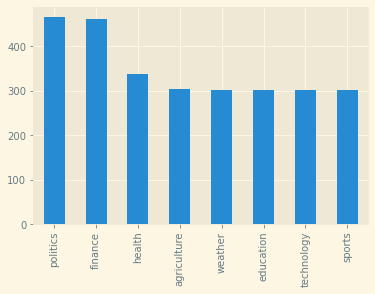

In [59]:
training_data['catagory'].value_counts().plot(kind='bar')

In [71]:
vectors_train = []
# vectors_pre_test = []

for text in tqdm(training_data['news'].values,total=training_data.shape[0]):
    vectors_train.append(sentence_to_vec(model_f, text,word_tokenize, word_list))
#     vectors_pre_train.append(sentence_to_vec(model_pretrained, text,word_tokenize, word_list_pre))

  0%|          | 0/3173 [00:00<?, ?it/s]

In [72]:
vectors_train = np.array(vectors_train)
# vectors_pre_test = np.array(vectors_pre_test)

vectors_train.shape
# vectors_pre_test.shape

(3173, 300)

In [23]:
# testing_data['len'].plot.hist(bins=100)

<AxesSubplot:>

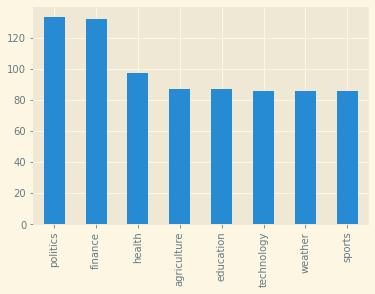

In [24]:
testing_data['catagory'].value_counts().plot(kind='bar')

In [73]:
vectors_test = []
# vectors_pre_test = []

for text in tqdm(testing_data['news'].values,total=testing_data.shape[0]):
    vectors_test.append(sentence_to_vec(model_f, text,word_tokenize, word_list))
#     vectors_pre_test.append(sentence_to_vec(model_pretrained, text,word_tokenize, word_list_pre))

  0%|          | 0/794 [00:00<?, ?it/s]

In [ ]:
for item in range(len(vectors_test)):
    if len(vectors_test[item]) < 300:
        print(vectors_test[item])

In [74]:
vectors_test = np.array(vectors_test)
# vectors_pre_test = np.array(vectors_pre_test)

vectors_test.shape
# vectors_pre_test.shape


(794, 300)

In [27]:
len(vectors_test[0])

300

In [75]:
le = LabelEncoder()

yo_train = le.fit_transform(training_data['catagory'].values)
yo_test  = le.fit_transform(testing_data['catagory'].values)
train  = vectors_train
test   = vectors_test
train.shape,yo_train.shape,test.shape

((3173, 300), (3173,), (794, 300))

### Classification using classical machine learning
In this section we are going to classify our data using XGBOOST and CATBOOST
1. XGBoost Model

In [76]:
skf = StratifiedKFold(n_splits=5)
val_score = []
preds = np.zeros(shape=(testing_data.shape[0],8))
for fold,(trn_idx,val_idx) in tqdm(enumerate(skf.split(train,yo_train)),total=5):
    X_train,X_val = train[trn_idx],train[val_idx]
    y_train,y_val = yo_train[trn_idx],yo_train[val_idx]
    clf = xgb.XGBClassifier(objective='multi:softmax',num_class=8,
                                  eval_metric='mlogloss', n_estimators=1000)
    clf.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose=100)
    val_score.append(accuracy_score(y_val,clf.predict(X_val)))
    preds += clf.predict_proba(test)
    


  0%|          | 0/5 [00:00<?, ?it/s]

[0]	validation_0-mlogloss:1.64341
[100]	validation_0-mlogloss:0.62362
[200]	validation_0-mlogloss:0.62879
[300]	validation_0-mlogloss:0.63346
[400]	validation_0-mlogloss:0.63564
[500]	validation_0-mlogloss:0.63890
[600]	validation_0-mlogloss:0.64083
[700]	validation_0-mlogloss:0.64259
[800]	validation_0-mlogloss:0.64520
[900]	validation_0-mlogloss:0.64730
[999]	validation_0-mlogloss:0.64950
[0]	validation_0-mlogloss:1.69143
[100]	validation_0-mlogloss:0.61167
[200]	validation_0-mlogloss:0.61486
[300]	validation_0-mlogloss:0.61987
[400]	validation_0-mlogloss:0.62288
[500]	validation_0-mlogloss:0.62541
[600]	validation_0-mlogloss:0.62723
[700]	validation_0-mlogloss:0.62942
[800]	validation_0-mlogloss:0.63115
[900]	validation_0-mlogloss:0.63294
[999]	validation_0-mlogloss:0.63414
[0]	validation_0-mlogloss:1.64840
[100]	validation_0-mlogloss:0.54142
[200]	validation_0-mlogloss:0.53880
[300]	validation_0-mlogloss:0.53753
[400]	validation_0-mlogloss:0.53762
[500]	validation_0-mlogloss:0.5382

### CV(Cross Validation) score for XGBoost is   **0.8216929159375204**

In [66]:
print(np.mean(val_score))

0.8216909715470866


In [79]:
accuracy_score(testing_data['catagory'], label)

0.8463476070528967

In [78]:
from sklearn.metrics import f1_score, classification_report,accuracy_score 

preds = preds/5
label = le.inverse_transform(np.argmax(preds,axis=-1))
label

cls_rep = classification_report(testing_data['catagory'], label)
dfacc = pd.DataFrame(classification_report(testing_data['catagory'], label, output_dict=True)).T
# nw
print(cls_rep)
dfac = dfacc.drop(columns = ['support'])
print(dfac.to_latex())


              precision    recall  f1-score   support

 agriculture       0.89      0.87      0.88        87
   education       0.90      0.83      0.86        87
     finance       0.78      0.79      0.78       132
      health       0.88      0.80      0.84        97
    politics       0.82      0.89      0.86       133
      sports       0.98      0.94      0.96        86
  technology       0.73      0.77      0.75        86
     weather       0.86      0.88      0.87        86

    accuracy                           0.85       794
   macro avg       0.86      0.85      0.85       794
weighted avg       0.85      0.85      0.85       794

\begin{tabular}{lrrr}
\toprule
{} &  precision &    recall &  f1-score \\
\midrule
agriculture  &   0.894118 &  0.873563 &  0.883721 \\
education    &   0.900000 &  0.827586 &  0.862275 \\
finance      &   0.776119 &  0.787879 &  0.781955 \\
health       &   0.876404 &  0.804124 &  0.838710 \\
politics     &   0.820690 &  0.894737 &  0.856115 \\
s

In [68]:
print(np.mean(val_score))

0.8216909715470866


In [69]:
print(np.mean(val_score))

0.8216909715470866


In [32]:
print(np.mean(val_score))

0.8178300504235079


#### F1 score for ```xgbboost model``` on test set

In [33]:
from sklearn.metrics import f1_score, classification_report,accuracy 

preds = preds/5
label = le.inverse_transform(np.argmax(preds,axis=-1))
label

cls_rep = classification_report(testing_data['catagory'], label)
dfacc = pd.DataFrame(classification_report(testing_data['catagory'], label, output_dict=True)).T

In [34]:
# nw
print(cls_rep)
dfac = dfacc.drop(columns = ['support'])
print(dfac.to_latex())

              precision    recall  f1-score   support

 agriculture       0.89      0.87      0.88        87
   education       0.90      0.83      0.86        87
     finance       0.78      0.79      0.78       132
      health       0.88      0.80      0.84        97
    politics       0.82      0.89      0.86       133
      sports       0.98      0.94      0.96        86
  technology       0.73      0.77      0.75        86
     weather       0.86      0.88      0.87        86

    accuracy                           0.85       794
   macro avg       0.86      0.85      0.85       794
weighted avg       0.85      0.85      0.85       794

\begin{tabular}{lrrr}
\toprule
{} &  precision &    recall &  f1-score \\
\midrule
agriculture  &   0.894118 &  0.873563 &  0.883721 \\
education    &   0.900000 &  0.827586 &  0.862275 \\
finance      &   0.776119 &  0.787879 &  0.781955 \\
health       &   0.876404 &  0.804124 &  0.838710 \\
politics     &   0.820690 &  0.894737 &  0.856115 \\
s

In [35]:
print(cls_rep)

              precision    recall  f1-score   support

 agriculture       0.89      0.87      0.88        87
   education       0.90      0.83      0.86        87
     finance       0.78      0.79      0.78       132
      health       0.88      0.80      0.84        97
    politics       0.82      0.89      0.86       133
      sports       0.98      0.94      0.96        86
  technology       0.73      0.77      0.75        86
     weather       0.86      0.88      0.87        86

    accuracy                           0.85       794
   macro avg       0.86      0.85      0.85       794
weighted avg       0.85      0.85      0.85       794



As depicted here the ```f1-score``` is close to CV

## CatBoostClassifier

In [80]:
skf = StratifiedKFold(n_splits=5)
val_score = []
preds = np.zeros(shape=(testing_data.shape[0],8))
for fold,(trn_idx,val_idx) in tqdm(enumerate(skf.split(train,yo_train)),total=5):
    X_train,X_val = train[trn_idx],train[val_idx]
    y_train,y_val = yo_train[trn_idx],yo_train[val_idx]
    clf = CatBoostClassifier(loss_function='MultiClass')
    clf.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose=100)
    val_score.append(accuracy_score(y_val,clf.predict(X_val)))
    preds += clf.predict_proba(test)

  0%|          | 0/5 [00:00<?, ?it/s]

Learning rate set to 0.110006
0:	learn: 1.9967897	test: 2.0030325	best: 2.0030325 (0)	total: 1.12s	remaining: 18m 41s
100:	learn: 0.3850895	test: 0.7324460	best: 0.7324460 (100)	total: 1m 2s	remaining: 9m 16s
200:	learn: 0.2263667	test: 0.6331853	best: 0.6331853 (200)	total: 1m 56s	remaining: 7m 41s
300:	learn: 0.1630349	test: 0.5903782	best: 0.5901231 (299)	total: 2m 51s	remaining: 6m 39s
400:	learn: 0.1246656	test: 0.5658742	best: 0.5658742 (400)	total: 3m 57s	remaining: 5m 54s
500:	learn: 0.0973242	test: 0.5520698	best: 0.5520698 (500)	total: 4m 56s	remaining: 4m 55s
600:	learn: 0.0780466	test: 0.5444953	best: 0.5443931 (598)	total: 5m 59s	remaining: 3m 58s
700:	learn: 0.0641716	test: 0.5382457	best: 0.5382457 (700)	total: 7m 2s	remaining: 3m
800:	learn: 0.0532996	test: 0.5331641	best: 0.5331641 (800)	total: 8m 9s	remaining: 2m 1s
900:	learn: 0.0453263	test: 0.5280638	best: 0.5277571 (884)	total: 9m 13s	remaining: 1m
999:	learn: 0.0399553	test: 0.5253119	best: 0.5252656 (995)	total:

### CV(Cross Validation) score for CatBoost is   **0.833221206818329**

In [81]:
from sklearn.metrics import f1_score

preds = preds/5
label = le.inverse_transform(np.argmax(preds,axis=-1))
label

f1_score = f1_score(testing_data['catagory'], label, average='micro')


In [82]:
print(np.mean(val_score))

0.8405246031943168


In [85]:
accuracy_score(testing_data['catagory'], label)

0.8627204030226701

In [83]:
# new 
f1_score
print(classification_report(testing_data['catagory'], label))
dfaccatbo = pd.DataFrame(classification_report(testing_data['catagory'], label, output_dict=True)).T
dfaccatbo.drop(columns=['support'], inplace=True)
print(dfaccatbo.to_latex())

              precision    recall  f1-score   support

 agriculture       0.89      0.87      0.88        87
   education       0.92      0.84      0.88        87
     finance       0.79      0.81      0.80       132
      health       0.86      0.84      0.85        97
    politics       0.85      0.92      0.88       133
      sports       1.00      0.95      0.98        86
  technology       0.79      0.79      0.79        86
     weather       0.85      0.88      0.87        86

    accuracy                           0.86       794
   macro avg       0.87      0.86      0.87       794
weighted avg       0.86      0.86      0.86       794

\begin{tabular}{lrrr}
\toprule
{} &  precision &    recall &  f1-score \\
\midrule
agriculture  &   0.894118 &  0.873563 &  0.883721 \\
education    &   0.924051 &  0.839080 &  0.879518 \\
finance      &   0.786765 &  0.810606 &  0.798507 \\
health       &   0.861702 &  0.835052 &  0.848168 \\
politics     &   0.853147 &  0.917293 &  0.884058 \\
s

In [84]:
# new 
f1_score
print(classification_report(testing_data['catagory'], label))
dfaccatbo = pd.DataFrame(classification_report(testing_data['catagory'], label, output_dict=True)).T
dfaccatbo.drop(columns=['support'], inplace=True)
print(dfaccatbo.to_latex())

              precision    recall  f1-score   support

 agriculture       0.89      0.87      0.88        87
   education       0.92      0.84      0.88        87
     finance       0.79      0.81      0.80       132
      health       0.86      0.84      0.85        97
    politics       0.85      0.92      0.88       133
      sports       1.00      0.95      0.98        86
  technology       0.79      0.79      0.79        86
     weather       0.85      0.88      0.87        86

    accuracy                           0.86       794
   macro avg       0.87      0.86      0.87       794
weighted avg       0.86      0.86      0.86       794

\begin{tabular}{lrrr}
\toprule
{} &  precision &    recall &  f1-score \\
\midrule
agriculture  &   0.894118 &  0.873563 &  0.883721 \\
education    &   0.924051 &  0.839080 &  0.879518 \\
finance      &   0.786765 &  0.810606 &  0.798507 \\
health       &   0.861702 &  0.835052 &  0.848168 \\
politics     &   0.853147 &  0.917293 &  0.884058 \\
s

In [64]:
f1_score
print(classification_report(testing_data['catagory'], label))

              precision    recall  f1-score   support

 agriculture       0.90      0.82      0.85       130
   education       0.91      0.84      0.87       130
     finance       0.75      0.82      0.78       198
      health       0.86      0.83      0.85       145
    politics       0.85      0.90      0.87       200
      sports       0.98      0.94      0.96       129
  technology       0.77      0.76      0.76       130
     weather       0.87      0.88      0.88       129

    accuracy                           0.85      1191
   macro avg       0.86      0.85      0.85      1191
weighted avg       0.85      0.85      0.85      1191



So it evidant from the result that pretrained vector are inefficient

In [69]:
le = LabelEncoder()

yo_train = le.fit_transform(training_data['catagory'].values)
yo_test  = le.fit_transform(testing_data['catagory'].values)
train  = vectors_train
test   = vectors_test
train.shape,yo_train.shape
yo_test.shape[0] + yo_train.shape[0]

3967

## Deep Learning classification 
In this part we are going to test how deep learning model can word on this data set

still we have to deal with class imbalance 
we use pytorch frame work

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
X_train, X_val, y_train, y_val = train_test_split(train, yo_train, test_size=0.2, stratify=yo_train, random_state=43)

In [ ]:
X_train.shape

In [ ]:
# x_class, y_count  = numpy.unique(y_train, return_counts=True)
# x_class_val, y_count_val  = numpy.unique(y_val, return_counts=True)
# x_class_tes, y_count_test  = numpy.unique(y_test, return_counts=True)

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="catagory", data=data)

In [72]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(test).float(), torch.from_numpy(yo_test).long())

In [74]:
EPOCHS = 200
BATCH_SIZE = 10
LEARNING_RATE =4e-5
NUM_FEATURES = train.shape[1]
NUM_CLASSES = 8
USE_SWA = False
SWA_RATIO = 0.9
WARMUP_RATIO = 0.25
WEIGHT_DECAY = 0.001
SWA_FREQ = 30
num_train_steps =  int(len(X_train) / BATCH_SIZE * EPOCHS)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
num_train_steps

cpu


44400

In [75]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          )
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
x  = test_loader

In [95]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 128)
        self.layer_2 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [96]:
# model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
# model.to(device)
# # optimizer = noptim.SGD(model, 0.1)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

# optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)


In [97]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)
criterion = nn.CrossEntropyLoss()
param_optimizer = list(model.named_parameters())
no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]

optimizer_parameters = [
    {
        "params": [
            p for n, p in param_optimizer if not any(nd in n for nd in no_decay)
        ],
        "weight_decay": WEIGHT_DECAY,
    },
    {
        "params": [
            p for n, p in param_optimizer if any(nd in n for nd in no_decay)
        ],
        "weight_decay": 0.0,
    },
]
base_opt = transformers.AdamW(optimizer_parameters, lr=LEARNING_RATE)
optimizer = torchcontrib.optim.SWA(
    base_opt,
    swa_start=int(num_train_steps * SWA_RATIO),
    swa_freq=SWA_FREQ,
    swa_lr=None,
)

scheduler = transformers.get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=int(num_train_steps * WARMUP_RATIO),
    num_training_steps=num_train_steps,
)
if USE_SWA:
    optimizer.swap_swa_sgd()
        

In [98]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [99]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [100]:
len(test_loader)

1191

In [101]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        scheduler.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
    
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    if e % 10 == 0:
        print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 010: | Train Loss: 2.07514 | Val Loss: 1.99149 | Train Acc: 18.153| Val Acc: 25.540
Epoch 020: | Train Loss: 1.79196 | Val Loss: 1.69461 | Train Acc: 35.225| Val Acc: 63.669
Epoch 030: | Train Loss: 1.48131 | Val Loss: 1.37089 | Train Acc: 54.009| Val Acc: 74.101
Epoch 040: | Train Loss: 1.17682 | Val Loss: 1.05959 | Train Acc: 67.928| Val Acc: 78.237
Epoch 050: | Train Loss: 0.95322 | Val Loss: 0.84998 | Train Acc: 73.874| Val Acc: 79.496
Epoch 060: | Train Loss: 0.78693 | Val Loss: 0.72157 | Train Acc: 78.018| Val Acc: 80.216
Epoch 070: | Train Loss: 0.67356 | Val Loss: 0.66520 | Train Acc: 81.036| Val Acc: 80.576
Epoch 080: | Train Loss: 0.58778 | Val Loss: 0.64299 | Train Acc: 83.874| Val Acc: 80.755
Epoch 090: | Train Loss: 0.53293 | Val Loss: 0.61766 | Train Acc: 84.820| Val Acc: 81.115
Epoch 100: | Train Loss: 0.47821 | Val Loss: 0.61636 | Train Acc: 87.162| Val Acc: 81.115
Epoch 110: | Train Loss: 0.46584 | Val Loss: 0.60018 | Train Acc: 87.027| Val Acc: 81.475
Epoch 120:

In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:

idx2class = {v:le.classes_[v] for v in range(8)}


In [ ]:
le.classes_[7]

In [ ]:

confusion_matrix_df = pd.DataFrame(confusion_matrix(yo_test, y_pred_list)).rename(columns=idx2class, index=idx2class)
# sns.heatmap(confusion_matrix_df, annot=True)
confusion_matrix_df

In [ ]:
#new 
print(classification_report(yo_test, y_pred_list))

In [ ]:
print(classification_report(yo_test, y_pred_list))

### CNN and LSTM Model
Almost all the above model works similarly let see with CNN and LSTM

1. CNN Model

In [86]:
import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch

#import spacy
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm

tqdm.pandas(desc='Progress')
from collections import Counter

from nltk import word_tokenize

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable
from sklearn.metrics import f1_score
import os 

from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# cross validation and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch as t
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('news10.csv')

In [ ]:
df['len'] = df['news'].apply(lambda s : len(s))

In [ ]:
df['len'].plot.hist(bins=100)

In [ ]:
df.len.quantile(0.9)

In [ ]:
count_df = data[['news','catagory']].groupby('catagory').aggregate({'news':'count'}).reset_index().sort_values('news',ascending=False)
count_df.head()

In [ ]:
import plotly.express as px

In [ ]:
px.bar(count_df[count_df['news']>0],x='catagory',y='news')

In [ ]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [ ]:
# lower the text
df["news"] = df["news"].apply(lambda x: x.lower())

# Clean the text
df["news"] = df["news"].apply(lambda x: clean_text(x))

# Clean numbers
df["news"] = df["news"].apply(lambda x: clean_numbers(x))


In [ ]:
df['catagory'].unique()

In [ ]:
ml = data.copy(deep=True)

In [ ]:
def group_by_cat(cat):
    if cat == 'agriculture' or cat == 'health' or cat == 'weather':
        return 'health'
    if cat == 'economics' or cat == 'politics':
        return 'economics'
    if cat == 'education' or cat == 'technology':
        return 'economics'
    else:
        return 'sports'

In [ ]:
ml['catagory'] = ml['catagory'].apply(group_by_cat)

In [ ]:
ml['catagory'].value_counts()

In [ ]:
ml['catagory'].value_counts()

In [ ]:
ml['news'].drop_duplicates(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.describe()

## Preprocess 

In [23]:
stop_word=['akka','akkasumas','akkum','akkuma','ammo','ammoo','ani','booda','booddee','dura','eega','eegana','irratti', 'itti', 'ni','1','2','3',
            'eegasii','ennaa','erga','fi','garuu','hanga','henna','hoggaa','hogguu','hoo','illee','immoo','ini','innaa','isaa',
            'isaan','iseen','itumallee','ituu','ituullee','jechaan','jechuun','kan','kanaaf','kanaafi','kanaafuu','koo','kun','hin', 'f'
            'malee','moo','odoo','ofii','oggaa','oo','osoo','otoo','otumallee','otuu','otuullee','saniif','silaa','simmoo','sun','tahuullee','tanaafi','tanaafuu',"ta'ullee",'tawullee',
            'waggaa','woo','yammuu','yemmuu','yeroo','yommii','yommuu','yoo','yookaan','yookiiin','yookinimoo','yoom','fi','ennaa','oo', 'xaa', 'fe','ta', 'ullee','obbo','to'
             ,'tahee', 'kana', 'gara', 'ture', 'irraa', 'ffaa', 'keessa', 'keessan', 'waliin', 'isaanii','jedhan',
            'ee', 'ffaan','keessaa', 'waliin', 'ta\'uu', 'tahuun', 'qabu', 'kuma', 'keessatti', 'ol', 'keenya', 'tahu', 'tahuu', 'jira','jedhame','kanaan',
           'waan', 'garee', 'wal', 'ibsaniiru', 'jedhaniiru','beeksiseera', 'nu', 'qabna', 'dha','qabdu','waloo','dhiyaate', 'fbc','jiru',
             'turan', 'yaadatama', 'taahaa', 'haaluma','walfakkaatuun', 'yookiin','jedha','ishe', 'jedhameera', 'haala', 'tahe','qaban', 'dabalataan',
             'gadi','tahan','tokko','himameera', 'kanaa', 'kanneen', 'kunneen', 'hedduu','tahus','taasisaniin',  'tasisan','garaagaraa','jirti'
            ,'nuuf','qabne', 'jedhaniiru', 'qabne','turaniiru','booda','an','obn','qabas','irratt','ba','beekkameera','haala'
           , 'ammajjii' ,'amajjii', 'guraandhala','gurraandhala','al','himaniiru', 'bitootessa', 'ebla', 'caamsaa', 'waxabajjii', 'adoolessa', 'hagayya', 'fulbaana', 'onkololeessa', 'sadaasa','muddee'
            ,'irra', 'malee', 'aadde' 'obbo','guyyaa', 'harha','as', 'danda', 'qaba', 'hn', 'isaaniin', 'himame', 'jiran' , 'jedhameeti', 'eegama','jedheera',
            'bara', 'hojii','sahaatii', 'walii','miti','nuti','biin','ibsameera','tti','walitti','jedhu','inni','aa','adda','haa','isa','of','uk'
            ,'uu', 'ga', 'bu','kanarratti','atan','ataniiru', 'har', 'uun','eera','duu']

In [25]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel 

In [26]:
def sentence_stemming(sentence):
    new_word = []

    for word in sentence.split(' '):
        new_w = clean_text(word)
#         new_w = st.stem(new_w)
        new_word.append(new_w)
        text_out = ' '.join(new_word)
    return (text_out)

In [27]:
def preprocess_data(text):
    new_str = text.replace("'", 'h')
    # replace all variants of hudhaa (')
    new_str = new_str.replace("'", 'h')
    new_str = new_str.replace(u'’','h')
    new_str = new_str.replace("‘", "h");
    new_str = new_str.replace("`", "h");
    new_str = new_str.replace("’", "h");
    new_str = new_str.replace("′", "h");
    new_str = new_str.replace("︐", "h");
    new_str = new_str.replace('(', '')
    new_str = new_str.replace(')', '')
    return listToString(new_str)

In [28]:
def listToString(s): 
    
    str1 = "" 
    
    for ele in s: 
        str1 += ele  
    
    return str1 

In [29]:
def get_all(news):
    return [sentence_stemming(x) for x in news]

In [30]:
def gen_words(texts):
    final = []
    for text in texts:
        new = simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [31]:
check = datap['news']

In [32]:
dd = get_all(check)
dd[0][0:92]

'ministeerichi qabeenya uummaamaa irratti marii gaggeessaa jira finfinnee muddee   – ministee'

In [33]:
data_words_with_stop = gen_words(dd)

print (data_words_with_stop[0][0:20])

['ministeerichi', 'qabeenya', 'uummaamaa', 'irratti', 'marii', 'gaggeessaa', 'jira', 'finfinnee', 'muddee', 'ministeerri', 'qonnaa', 'fi', 'qabeenya', 'uummamaa', 'hojii', 'qabeenya', 'uummamaarratti', 'magaalaa', 'adaamaatti', 'marii']


In [34]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_word] for doc in texts]
data_words = remove_stopwords(data_words_with_stop)
print (data_words[1])
print (datap['news'][1])

['ministeerri', 'qonnaa', 'fdri', 'oomishti', 'qonnaan', 'bulaa', 'qisaasamne', 'yaadachiise', 'ministeerichi', 'oomishti', 'sassaabbame', 'sirnaan', 'kaaamus', 'dhaamera', 'ministir', 'deettaan', 'ministeerichaa', 'saanii', 'raddiin', 'faanaa', 'broodkaastiing', 'koorporeetitti', 'himanitti', 'lafa', 'oomisha', 'qonna', 'gannaa', 'sanyiidhan', 'uwwifame', 'sassaabbameera', 'sassaabbiitti', 'eeggannaan', 'taasifamu', 'kuusaa', 'keessattis', 'qisaasamne', 'eeggannaa', 'gochuun', 'barbaachisaa', 'tauu', 'eeraniiru', 'qophii', 'ooyruurratti', 'fayyadamtummaan', 'sadarkaa', 'olaanaarra', 'qaqqabaa', 'dhufuu', 'oomishti', 'naannoo', 'baddaatti', 'qabamin', 'sassaabbamuuf', 'roobni', 'sodaachisaan', 'midhaan', 'balleesu', 'jiraachuu', 'baatus', 'hirmaannaa', 'tumsi', 'hawaasaa', 'fufu', 'gaafataniiru', 'midhaan', 'ooyrurraa', 'sassaabuun', 'cinaatti', 'hojiin', 'misooma', 'jallisii', 'fufuu', 'ibsan', 'saaniin', 'lafa', 'misooma', 'jallisii', 'qamadiidhan', 'uwwisuuf', 'karoorfame', 'heektaa

In [35]:
def list_to_sent(lst):
    return ' '.join(l for l in lst)

In [36]:
ss = list_to_sent(data_words[1])
ss

'ministeerri qonnaa fdri oomishti qonnaan bulaa qisaasamne yaadachiise ministeerichi oomishti sassaabbame sirnaan kaaamus dhaamera ministir deettaan ministeerichaa saanii raddiin faanaa broodkaastiing koorporeetitti himanitti lafa oomisha qonna gannaa sanyiidhan uwwifame sassaabbameera sassaabbiitti eeggannaan taasifamu kuusaa keessattis qisaasamne eeggannaa gochuun barbaachisaa tauu eeraniiru qophii ooyruurratti fayyadamtummaan sadarkaa olaanaarra qaqqabaa dhufuu oomishti naannoo baddaatti qabamin sassaabbamuuf roobni sodaachisaan midhaan balleesu jiraachuu baatus hirmaannaa tumsi hawaasaa fufu gaafataniiru midhaan ooyrurraa sassaabuun cinaatti hojiin misooma jallisii fufuu ibsan saaniin lafa misooma jallisii qamadiidhan uwwisuuf karoorfame heektaara amma ammaatti kumni sanyiidhan uwwifameera qonnaan bulaan jallisiidhan misoomsa lafa heektaara miiliyoona kumni dhibbi misoomuu eegaleera'

In [37]:
dw = []
for d in data_words:
    dw.append(list_to_sent(d))

In [29]:
datap['news'] = dw

In [38]:
datap['news'][1]

'ministeerri qonnaa fdri oomishti qonnaan bulaa akka hin qisaasamne yaadachiise  ministeerichi oomishti sassaabbame sirnaan akka kaaamus dhaamera  ministir deettaan ministeerichaa obbo saanii raddiin faanaa broodkaastiing koorporeetitti akka himanitti lafa bara oomisha qonna gannaa  sanyiidhan uwwifame keessaa  sassaabbameera  yeroo sassaabbiitti akkuma of eeggannaan taasifamu kuusaa keessattis akka hin qisaasamne of eeggannaa gochuun barbaachisaa tauu eeraniiru  qophii ooyruurratti fayyadamtummaan meekaanaayzeeshinii sadarkaa olaanaarra qaqqabaa dhufuu ibsaniiru  oomishti naannoo baddaatti walitti hin qabamin akka sassaabbamuuf roobni sodaachisaan midhaan balleesu jiraachuu baatus hirmaannaa fi tumsi hawaasaa akka itti fufu gaafataniiru  midhaan ooyrurraa sassaabuun cinaatti hojiin misooma jallisii itti fufuu ibsan obbo saaniin  lafa misooma jallisii qamadiidhan uwwisuuf karoorfame heektaara kuma  keessaa amma ammaatti kumni  sanyiidhan uwwifameera  qonnaan bulaan jallisiidhan ni miso

In [39]:
len(data_words)

3967

In [41]:
datap.describe()

,news,catagory
count,3886,3886
unique,3883,8
top,dhaabbata madaaallii ga’umsa ityoophiyaatti gi...,politics
freq,2,652


In [40]:
datap.drop_duplicates(inplace=True)
datap = datap[datap['catagory'] !='economics']
print(datap['catagory'].value_counts())
print(datap.shape)

politics       652
finance        651
health         478
agriculture    430
education      425
sports         424
technology     420
weather        406
Name: catagory, dtype: int64
(3886, 2)


In [ ]:
def to_word(sent):
    words = [s for s in sent.split(' ')]
    return len(words)    

In [ ]:
data['word_len'] = data['news'].apply(to_word)
df['word_len'] = df['news'].apply(to_word)

In [ ]:
sm = data[data['word_len']  == 1384]
smin = df[df['word_len'] == 12]
smin['news'][1578]

In [87]:
from sklearn.model_selection import train_test_split
tain_X, test_X, train_y, test_y = train_test_split(data['news'], data['catagory'],
                                                    stratify=data['catagory'], 
                                                    test_size=0.2,random_state = 43)

In [88]:
embed_size = 300 # how big is each word vector
max_features = 30000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 512 # max number of words in a question to use
batch_size = 8 # how many samples to process at once
n_epochs = 10 # how many times to iterate over all samples
n_splits = 5 # Number of K-fold Splits
SEED = 43
LEARNING_RATE = 4e-5
USE_SWA = False
SWA_RATIO = 0.9
WARMUP_RATIO = 0.25
WEIGHT_DECAY = 0.001
SWA_FREQ = 1
num_train_steps =  int(len(tain_X) / batch_size * n_epochs)
num_train_steps

3966

In [89]:
## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(tain_X))
train_X = tokenizer.texts_to_sequences(tain_X)
test_X = tokenizer.texts_to_sequences(test_X)

In [90]:
## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

In [91]:
train_X.shape

(3173, 512)

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_y.values)
test_y = le.transform(test_y.values)

In [93]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [94]:
#load embeddings
import codecs
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('text_vec2.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...


0it [00:00, ?it/s]

found 42702 word vectors


In [95]:
#embedding matrix
print('preparing embedding matrix...')
word_index = tokenizer.word_index
words_not_found = []
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 16172


In [96]:
data.shape[0]

3967

In [97]:
np.shape(embedding_matrix)

(30000, 300)

In [98]:
class CNN_Text(nn.Module):
    
    def __init__(self):
        super(CNN_Text, self).__init__()
        filter_sizes = [1,2,3]

        num_filters = 64
        n_classes = len(le.classes_)
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.convs1 = nn.ModuleList([nn.Conv2d(1, num_filters, (K, embed_size)) for K in filter_sizes])
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(len(filter_sizes)*num_filters, n_classes)


    def forward(self, x):
        x = self.embedding(x) 
        x = x.unsqueeze(1)  
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1] 
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  
        x = torch.cat(x, 1)
        x = self.dropout(x) 
        x = self.dropout(x)
        logit = self.fc1(x) 
        return logit
model = CNN_Text()
print(model)

CNN_Text(
  (embedding): Embedding(30000, 300)
  (convs1): ModuleList(
    (0): Conv2d(1, 64, kernel_size=(1, 300), stride=(1, 1))
    (1): Conv2d(1, 64, kernel_size=(2, 300), stride=(1, 1))
    (2): Conv2d(1, 64, kernel_size=(3, 300), stride=(1, 1))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=192, out_features=8, bias=True)
)


In [54]:
# # criterion = nn.CrossEntropyLoss()
# param_optimizer = list(model.named_parameters())
# no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]

# optimizer_parameters = [
#     {
#         "params": [
#             p for n, p in param_optimizer if not any(nd in n for nd in no_decay)
#         ],
#         "weight_decay": WEIGHT_DECAY,
#     },
#     {
#         "params": [
#             p for n, p in param_optimizer if any(nd in n for nd in no_decay)
#         ],
#         "weight_decay": 0.0,
#     },
# ]
# # base_opt = transformers.AdamW(optimizer_parameters, lr=LEARNING_RATE)
# base_opt = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LEARNING_RATE)

# optimizer = torchcontrib.optim.SWA(
#     base_opt,
#     swa_start=int(num_train_steps * SWA_RATIO),
#     swa_freq=SWA_FREQ,
#     swa_lr=None,
# )

# scheduler = transformers.get_linear_schedule_with_warmup(
#     optimizer=optimizer,
#     num_warmup_steps=int(num_train_steps * WARMUP_RATIO),
#     num_training_steps=num_train_steps,
# )
# if USE_SWA:
#     optimizer.swap_swa_sgd()

# wandb.init(project="ao_news_classification", entity="gamme")
# wandb.config = {
#   "learning_rate": 0.001,
#   "epochs": n_epochs,
#   "batch_size": batch_size
# }

In [99]:
model = CNN_Text()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.to(device)

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).to(device)
y_train = torch.tensor(train_y, dtype=torch.long).to(device)
x_cv = torch.tensor(test_X, dtype=torch.long).to(device)
y_cv = torch.tensor(test_y, dtype=torch.long).to(device)

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in tqdm(range(n_epochs)):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        
        avg_loss += loss.item() / len(train_loader)
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),len(le.classes_)))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred, dim=1).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 	 loss=12.4767 	 val_loss=6.8688  	 val_acc=0.7834  	 time=51.44s
Epoch 2/10 	 loss=7.6408 	 val_loss=4.9685  	 val_acc=0.8237  	 time=52.80s
Epoch 3/10 	 loss=6.1668 	 val_loss=4.3034  	 val_acc=0.8325  	 time=52.13s
Epoch 4/10 	 loss=5.7189 	 val_loss=3.9520  	 val_acc=0.8526  	 time=53.34s
Epoch 5/10 	 loss=5.0504 	 val_loss=3.8858  	 val_acc=0.8514  	 time=46.77s
Epoch 6/10 	 loss=4.6268 	 val_loss=3.7060  	 val_acc=0.8514  	 time=47.17s
Epoch 7/10 	 loss=4.4317 	 val_loss=3.6023  	 val_acc=0.8589  	 time=49.34s
Epoch 8/10 	 loss=4.2113 	 val_loss=3.5993  	 val_acc=0.8627  	 time=59.47s
Epoch 9/10 	 loss=3.8541 	 val_loss=3.5647  	 val_acc=0.8539  	 time=46.11s
Epoch 10/10 	 loss=3.6361 	 val_loss=3.4779  	 val_acc=0.8665  	 time=49.05s


In [ ]:
torch.save(model,'textcnn_model')

In [104]:
def plot_graph(epochs):
    fig = plt.figure(figsize=(8,8))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.legend(loc='best')
    fig.savefig("blstm.png")

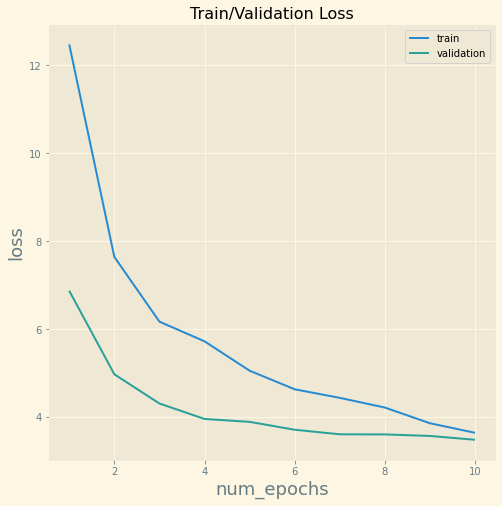

In [105]:
plot_graph(n_epochs)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

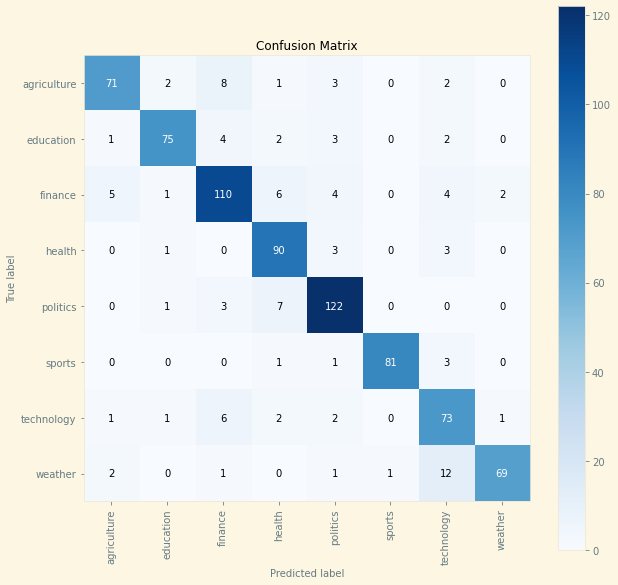

In [110]:
import scikitplot as skplt
from sklearn.metrics import classification_report
y_true = [le.classes_[x] for x in test_y]
y_pred = [le.classes_[x] for x in val_preds.argmax(axis=1)]
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(10,10),x_tick_rotation=90)

In [107]:
accuracy_score(y_true, y_pred)

0.8664987405541562

In [45]:
print(classification_report(y_true, y_pred))
pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).T

              precision    recall  f1-score   support

 agriculture       0.83      0.91      0.87        87
   education       0.88      0.87      0.88        87
     finance       0.79      0.85      0.82       132
      health       0.88      0.79      0.83        97
    politics       0.88      0.90      0.89       133
      sports       0.95      0.97      0.96        86
  technology       0.90      0.70      0.78        86
     weather       0.84      0.90      0.87        86

    accuracy                           0.86       794
   macro avg       0.87      0.86      0.86       794
weighted avg       0.86      0.86      0.86       794



,precision,recall,f1-score,support
agriculture,0.831579,0.908046,0.868132,87.000000
education,0.883721,0.873563,0.878613,87.000000
finance,0.788732,0.848485,0.817518,132.000000
health,0.875000,0.793814,0.832432,97.000000
politics,0.875912,0.902256,0.888889,133.000000
sports,0.954023,0.965116,0.959538,86.000000
technology,0.895522,0.697674,0.784314,86.000000
weather,0.836957,0.895349,0.865169,86.000000
accuracy,0.861461,0.861461,0.861461,0.861461
macro avg,0.867681,0.860538,0.861825,794.000000


In [59]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

 agriculture       0.87      0.86      0.87        87
   education       0.83      0.84      0.83        86
     finance       0.80      0.77      0.78       132
      health       0.80      0.87      0.83        97
    politics       0.88      0.91      0.89       133
      sports       0.98      0.99      0.98        86
  technology       0.85      0.78      0.81        87
     weather       0.89      0.88      0.89        86

    accuracy                           0.86       794
   macro avg       0.86      0.86      0.86       794
weighted avg       0.86      0.86      0.86       794



2. LSTM model

In [108]:
class BiLSTM(nn.Module):
    
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.hidden_size = 64
        drp = 0.5
        n_classes = len(le.classes_)
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_size, self.hidden_size, bidirectional=True, batch_first=True)
        self.linear = nn.Linear(self.hidden_size*4 , 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drp)
        self.out = nn.Linear(64, n_classes)


    def forward(self, x):
        #rint(x.size())
        h_embedding = self.embedding(x)
        #_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.relu(self.linear(conc))
        conc = self.dropout(conc)
        out = self.out(conc)
        return out
model = BiLSTM()
print(model)

BiLSTM(
  (embedding): Embedding(30000, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=256, out_features=64, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (out): Linear(in_features=64, out_features=8, bias=True)
)


In [109]:
model = BiLSTM()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.to(device)

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).to(device)
y_train = torch.tensor(train_y, dtype=torch.long).to(device)
x_cv = torch.tensor(test_X, dtype=torch.long).to(device)
y_cv = torch.tensor(test_y, dtype=torch.long).to(device)

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)
    
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),len(le.classes_)))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred, dim=1).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

Epoch 1/10 	 loss=13.0354 	 val_loss=7.1734  	 val_acc=0.7305  	 time=265.30s
Epoch 2/10 	 loss=7.2744 	 val_loss=5.1824  	 val_acc=0.7935  	 time=301.77s
Epoch 3/10 	 loss=5.4056 	 val_loss=4.1779  	 val_acc=0.8489  	 time=274.00s
Epoch 4/10 	 loss=3.9848 	 val_loss=3.8081  	 val_acc=0.8627  	 time=258.36s
Epoch 5/10 	 loss=3.1627 	 val_loss=4.0192  	 val_acc=0.8451  	 time=256.01s
Epoch 6/10 	 loss=2.5362 	 val_loss=3.5555  	 val_acc=0.8753  	 time=248.16s
Epoch 7/10 	 loss=2.1376 	 val_loss=3.7454  	 val_acc=0.8728  	 time=248.41s
Epoch 8/10 	 loss=1.9278 	 val_loss=3.8488  	 val_acc=0.8564  	 time=248.98s
Epoch 9/10 	 loss=1.2612 	 val_loss=3.9505  	 val_acc=0.8728  	 time=263.52s
Epoch 10/10 	 loss=1.0225 	 val_loss=3.9761  	 val_acc=0.8703  	 time=280.88s


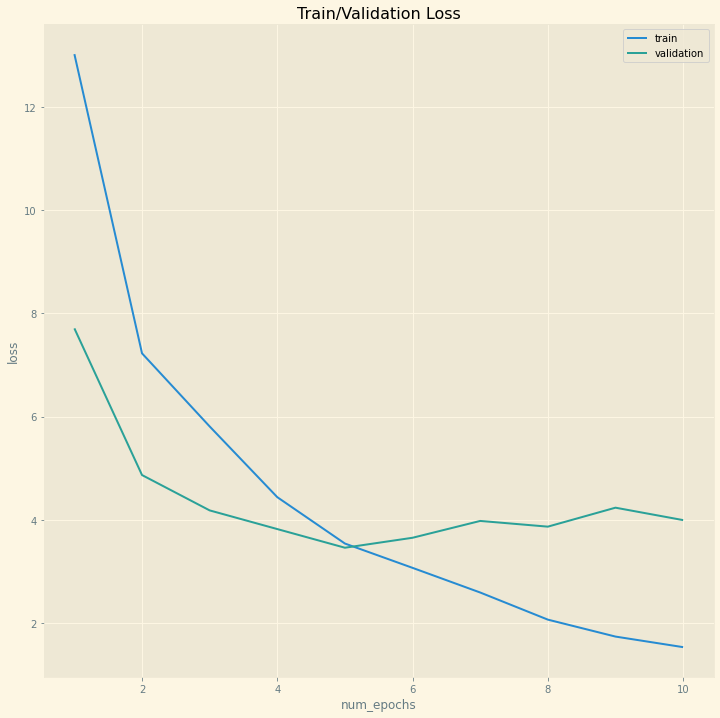

wandb: Network error resolved after 0:00:44.473808, resuming normal operation.


In [73]:
plot_graph(n_epochs)

In [ ]:
torch.save(model,'bilstm_model')

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

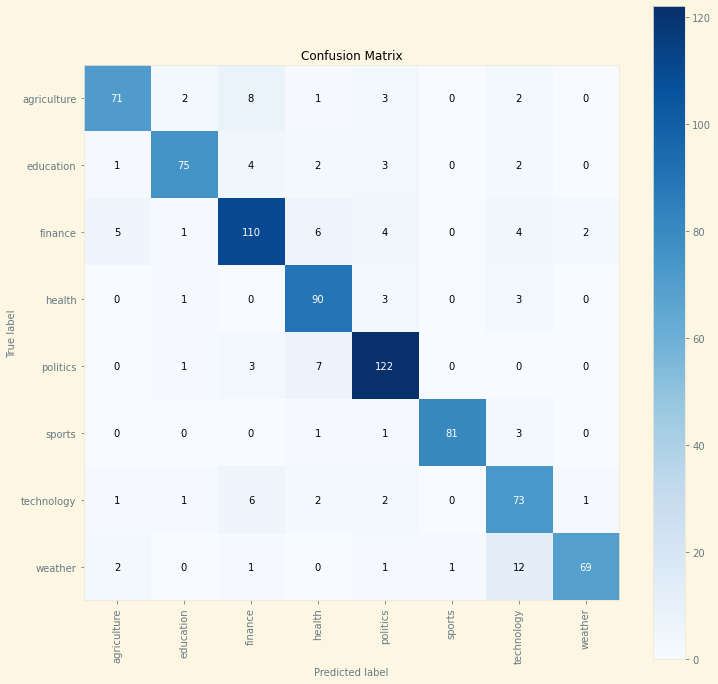

In [111]:
import scikitplot as skplt
y_true = [le.classes_[x] for x in test_y]
y_pred = [le.classes_[x] for x in val_preds.argmax(axis=1)]
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12),x_tick_rotation=90)

In [112]:
accuracy_score(y_true, y_pred)

0.8702770780856424

In [50]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

 agriculture       0.84      0.91      0.87        87
   education       0.89      0.92      0.90        87
     finance       0.86      0.82      0.84       132
      health       0.86      0.82      0.84        97
    politics       0.90      0.94      0.92       133
      sports       0.95      0.98      0.97        86
  technology       0.85      0.79      0.82        86
     weather       0.85      0.84      0.84        86

    accuracy                           0.88       794
   macro avg       0.88      0.88      0.88       794
weighted avg       0.88      0.88      0.88       794



wandb: Network error resolved after 0:00:40.955656, resuming normal operation.
wandb: Network error resolved after 0:01:27.615121, resuming normal operation.
wandb: Network error resolved after 0:01:01.987405, resuming normal operation.
wandb: Network error resolved after 0:00:39.819205, resuming normal operation.
wandb: Network error resolved after 0:01:46.044137, resuming normal operation.
wandb: Network error resolved after 0:10:55.107659, resuming normal operation.
wandb: Network error resolved after 0:01:26.613022, resuming normal operation.
wandb: Network error resolved after 0:03:12.783001, resuming normal operation.


In [ ]:
print(classification_report(y_true, y_pred))

Using Afribert

In [114]:
# from transformers import AutoTokenizer, AutoModelForTokenClassification
# model = AutoModelForTokenClassification.from_pretrained("castorini/afriberta_large")
# tokenizer = AutoTokenizer.from_pretrained("castorini/afriberta_large")
# tokenizer.model_max_length = 512
from simpletransformers.classification import ClassificationModel
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [131]:
modelb = ClassificationModel('xlmroberta', "castorini/afriberta_base",  num_labels=8,use_cuda=False,args={"reprocess_input_data": True,'num_train_epochs': 3, "overwrite_output_dir": True})


Some weights of the model checkpoint at castorini/afriberta_base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at castorini/afriberta_base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [132]:
models = ClassificationModel('xlmroberta', "castorini/afriberta_small",  num_labels=8,use_cuda=False,args={"reprocess_input_data": True,'num_train_epochs': 3, "overwrite_output_dir": True})
# model = TransformerModel('xlm-roberta', "castorini/afriberta_large", num_labels=4, args={'learning_rate':1e-5, 'num_train_epochs': 2, 'reprocess_input_data': True, 'overwrite_output_dir': True})

Some weights of the model checkpoint at castorini/afriberta_small were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at castorini/afriberta_small and are newly initialized: ['classifier.out_proj.weight', 'clas

In [123]:
modell = ClassificationModel('xlmroberta', "castorini/afriberta_larg",  num_labels=8,use_cuda=False,args={"reprocess_input_data": True,'num_train_epoc': 1, "overwrite_output_dir": True})
# model = TransformerModel('xlm-roberta', "castorini/afriberta_large", num_labels=4, args={'learning_rate':1e-5, 'num_train_epochs': 2, 'reprocess_input_data': True, 'overwrite_output_dir': True})

SyntaxError: EOL while scanning string literal (<ipython-input-123-f8aa8c94263e>, line 1)

In [80]:
# modelx = ClassificationModel('xlmroberta', "xlm-roberta-large",  num_labels=7,weight=wj,use_cuda=False,args={"reprocess_input_data": True, "overwrite_output_dir": True})

In [133]:
dt = df.copy(deep=True)
dt = dt[dt['catagory'] !="economics"]
dt = dt[dt['catagory'] !="business"]
dt = dt[dt['catagory'] !="others"]

tr, ts = train_test_split(data, stratify=data['catagory'], random_state = 43,test_size=0.2)
tr['catagory'].value_counts()

politics       532
finance        527
health         386
agriculture    348
technology     346
weather        345
education      345
sports         344
Name: catagory, dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [135]:

tr['catagory'] = le.fit_transform(tr['catagory'].values)
ts['catagory'] = le.fit_transform(ts['catagory'].values)


In [77]:
# wj=n_samples / (n_classes * n_samplesj)
wj = []
for i in range(8):
    wj.append(tr.shape[0] / (8* tr[tr['catagory'] == i].shape[0]))
wj


[1.1397270114942528,
 1.1496376811594202,
 0.7526091081593927,
 1.0275259067357514,
 0.7455357142857143,
 1.1529796511627908,
 1.146315028901734,
 1.1496376811594202]

In [136]:
modelb.train_model(tr)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/397 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/397 [00:01<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/397 [00:02<?, ?it/s]

(1191, 0.43307039707799)

In [137]:
models.train_model(tr)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/397 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/397 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/397 [00:00<?, ?it/s]

(1191, 0.46709314075914016)

In [138]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
def f1_multiclass(labels, preds):
    return classification_report(labels, preds)
    
result1, model_outputs1, wrong_predictions1 = models.eval_model(ts, f1=f1_multiclass, acc=accuracy_score)

  0%|          | 0/794 [00:01<?, ?it/s]

Running Evaluation:   0%|          | 0/100 [00:00<?, ?it/s]

In [139]:
from sklearn.metrics import f1_score, accuracy_score,classification_report
def f1_multiclass(labels, preds):
    return classification_report(labels, preds)
    
result2, model_outputs2, wrong_predictions2 = modelb.eval_model(ts, f1=f1_multiclass, acc=accuracy_score)

  0%|          | 0/794 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/100 [00:00<?, ?it/s]

In [140]:
print(result1['acc'])
print(result1['f1'])

0.8942065491183879
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88        87
         1.0       0.95      0.91      0.93        87
         2.0       0.85      0.86      0.85       132
         3.0       0.90      0.91      0.90        97
         4.0       0.93      0.91      0.92       133
         5.0       0.96      0.95      0.96        86
         6.0       0.83      0.85      0.84        86
         7.0       0.86      0.91      0.88        86

    accuracy                           0.89       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.89      0.89       794



In [141]:
print(result2['acc'])
print(result2['f1'])

0.8942065491183879
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        87
         1.0       0.95      0.87      0.91        87
         2.0       0.83      0.83      0.83       132
         3.0       0.89      0.89      0.89        97
         4.0       0.90      0.93      0.92       133
         5.0       0.97      0.98      0.97        86
         6.0       0.86      0.86      0.86        86
         7.0       0.92      0.92      0.92        86

    accuracy                           0.89       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.89      0.89      0.89       794



In [91]:
model.train_model(tr)

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/397 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/397 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/397 [00:01<?, ?it/s]

(1191, 0.44476027195369255)

In [86]:
model.train_model(tr)

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/397 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/397 [00:01<?, ?it/s]

(794, 0.5495834770038845)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(ts, f1=f1_multiclass, acc=accuracy_score)

In [18]:
from sklearn.metrics import f1_score, accuracy_score,classification_report
def f1_multiclass(labels, preds):
    return classification_report(labels, preds)
    
result1, model_outputs1, wrong_predictions1 = models.eval_model(ts, f1=f1_multiclass, acc=accuracy_score)

  0%|          | 0/794 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/100 [00:00<?, ?it/s]

Training loss,█▄▃▂▂▃▅▁▃█▁▁▁▇▁▁▁▂▁▃▁▁▁▁▁▃▁▄▁▁▂▁▁▁▁▁▅▁▄
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▄▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.80262
global_step,1950
lr,0.0


In [55]:
le.classes_

array(['agriculture', 'education', 'finance', 'health', 'politics',
       'sports', 'technology', 'weather'], dtype=object)

In [58]:
print(result['acc'])


0.8979848866498741


In [56]:
print(result['f1'])

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90        87
         1.0       0.96      0.89      0.92        87
         2.0       0.81      0.81      0.81       132
         3.0       0.87      0.91      0.89        97
         4.0       0.95      0.92      0.93       133
         5.0       0.94      0.97      0.95        86
         6.0       0.86      0.88      0.87        86
         7.0       0.93      0.93      0.93        86

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



In [93]:
print(result['f1'])
# epoch 3

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        87
         1.0       0.99      0.91      0.95        87
         2.0       0.81      0.83      0.82       132
         3.0       0.90      0.90      0.90        97
         4.0       0.96      0.92      0.94       133
         5.0       0.94      0.94      0.94        86
         6.0       0.88      0.88      0.88        86
         7.0       0.92      0.91      0.91        86

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



In [88]:
print(result['f1'])
# epoch-2

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87        87
         1.0       0.97      0.90      0.93        87
         2.0       0.82      0.85      0.83       132
         3.0       0.91      0.88      0.89        97
         4.0       0.92      0.92      0.92       133
         5.0       0.95      0.95      0.95        86
         6.0       0.84      0.85      0.84        86
         7.0       0.88      0.90      0.89        86

    accuracy                           0.89       794
   macro avg       0.89      0.89      0.89       794
weighted avg       0.89      0.89      0.89       794



In [83]:
print(result['f1'])

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        87
         1.0       0.96      0.87      0.92        87
         2.0       0.83      0.80      0.81       132
         3.0       0.85      0.90      0.87        97
         4.0       0.92      0.88      0.90       133
         5.0       0.95      0.97      0.96        86
         6.0       0.75      0.84      0.79        86
         7.0       0.88      0.87      0.88        86

    accuracy                           0.87       794
   macro avg       0.88      0.88      0.88       794
weighted avg       0.88      0.87      0.87       794



In [75]:
print(result['f1'])

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        87
         1.0       0.93      0.89      0.91        87
         2.0       0.79      0.81      0.80       132
         3.0       0.91      0.86      0.88        97
         4.0       0.91      0.95      0.93       133
         5.0       0.96      0.95      0.96        86
         6.0       0.84      0.80      0.82        86
         7.0       0.86      0.85      0.85        86

    accuracy                           0.88       794
   macro avg       0.88      0.88      0.88       794
weighted avg       0.88      0.88      0.88       794



In [178]:
wrong_predictions

array([[ 6.71011543, -0.65753585, -0.67413652, ..., -0.93922257,
        -1.49169111, -1.01133561],
       [-2.61461759, -2.10014796, -1.841609  , ...,  2.57977128,
         0.63630182,  4.14503002],
       [-0.95912433, -1.14233339, -1.16430712, ...,  6.92256165,
        -0.89143431, -1.51006234],
       ...,
       [-0.09871805, -0.52734262,  5.76349831, ..., -2.64753866,
        -0.0103081 , -1.22587633],
       [-1.28819108, -1.22966862, -1.10200119, ..., -1.70985258,
        -0.5807634 ,  6.64490795],
       [ 6.72017097, -0.69895881, -0.73345363, ..., -0.90016299,
        -1.55005562, -0.92656219]])

In [70]:
def plot_graph_n(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Accuracy Over Epoch")
    plt.plot(list(np.arange(epochs) + 1) , Xr, label='Accuracy Over Epochs')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    fig.savefig("accuracy.png")

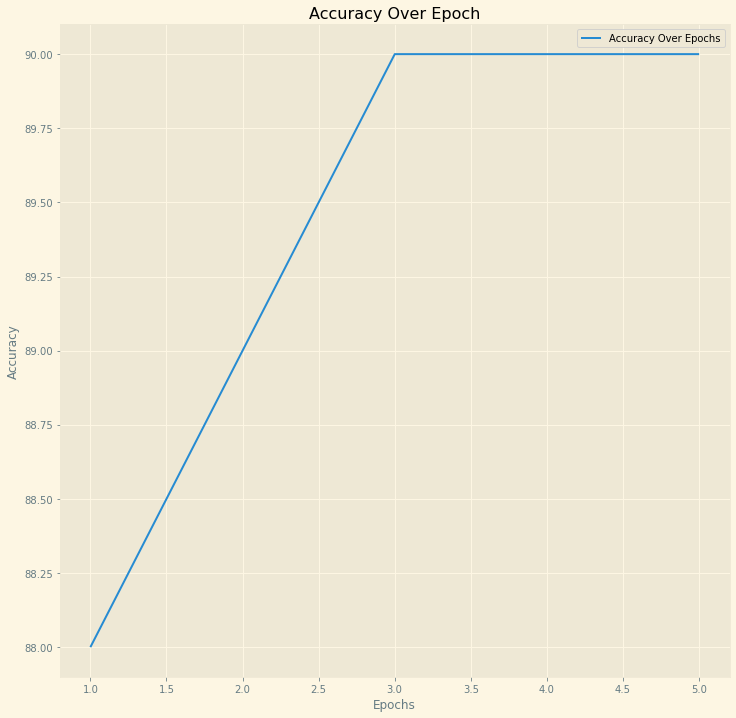

In [71]:
Xr = [88,89,90,90,90]
yr = 5
pdt = plot_graph_n(yr)
